# Body prefromance Dataset


This is data that confirmed the grade of performance with age and some exercise performance data.
This data was taken from kaggle website.

data shape : (13393, 12)

age : 20 ~64

gender : F,M

height_cm

weight_kg

body fat_%

gripForce

sit-ups counts

broad jump_cm

diastolic: is the part of the cardiac cycle during which the heart refills with blood after the emptying is done during systole

systolic: is the part of the cardiac cycle during which some chambers of the heart muscle contract after refilling with blood

class : A,B,C,D ( A: best)



# Importing libaries 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from IPython.display import Image
%matplotlib inline

### sit-up

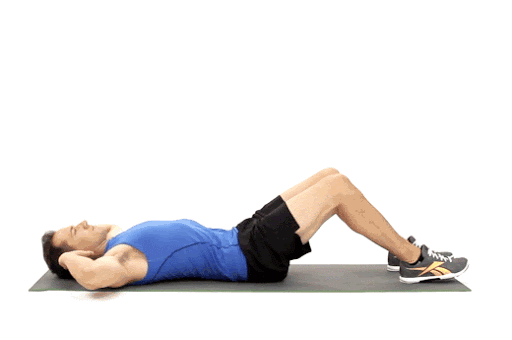

In [54]:
Image(filename="mekik-hareketleri-sit-ups.gif")


### gripForce

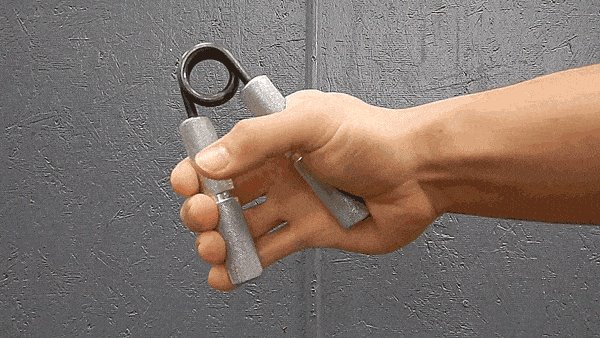

In [55]:
Image(filename="gripForce.gif")

### sit-up and bend forward

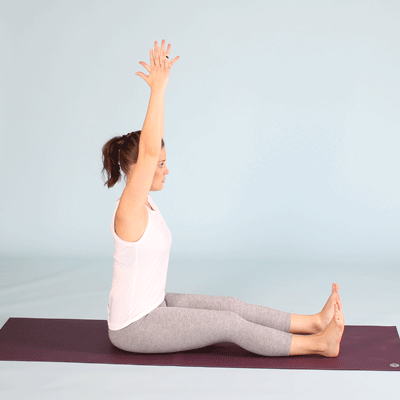

In [56]:
Image(filename="sitUpandBendForw.gif")

### broad jump

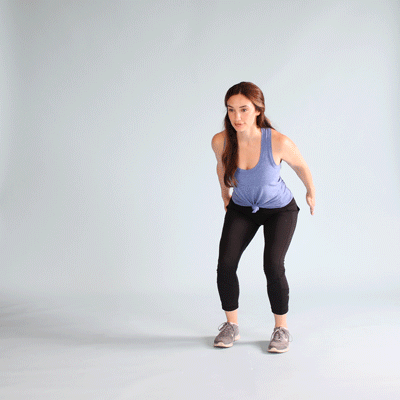

In [57]:
Image(filename="BoardJump.gif")

# Loading the Datasets

In [58]:
df = pd.read_csv("bodyPerformance.csv")

# EDA

In [59]:
# Dataset has 13393 rows and 12 col
df.shape

(13393, 12)

In [60]:
# We ge a brief glance at the data
df.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [62]:
# check if there is an outlier 
# Most col have a huge jump between 75% and max. This obserbation suggest there are outliers
df.describe()

age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13393.000000  13393.000000             13393.000000    13393.000000   
mean     130.234817     36.963877                15.209268       39.771224   
std       14.713954     10.624864                 8.456677       14.276698   
min        0.000000      0.000000               -25.000000        0.000000   
25%      120.000000     27.500000                10.900000       30.000000   
50%      130.000000     37.900000                16.200000       41.000000   
75%      141.000000     45.200000                20.700000       50.000000   
max      201.000000     70.500000               213.000000       80.000000   

       broad jump_cm  
count   13393.000000  
mean      190.129627  
std        39.868000  
min         0.000000  
25%       162.000000  
50%       193.000000  
75%       221.000000  
max       303.000000

### check outliers and deal with if there is any

In [63]:
# if we see there is outlier in the min value for sit and bend forward_cm = -25 cm also 213 cm and cann't be true

In [64]:
df.sort_values('sit and bend forward_cm', ascending=False).head(3)

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
2657  33.0      M      165.6       60.4        17.8       81.0     127.0   
3355  45.0      M      164.4       64.4        24.3       96.0     142.0   
4203  46.0      M      164.4       63.6        23.4       70.0     115.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
2657       38.6                    213.0            53.0          244.0     B  
3355       38.5                    185.0            44.0          223.0     A  
4203       36.0                     42.0            42.0          210.0     A

In [65]:
df = df[df['sit and bend forward_cm'] < 50]
df.sort_values('sit and bend forward_cm', ascending=False).head(3)

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
4203  46.0      M      164.4       63.6        23.4       70.0     115.0   
4438  59.0      M      175.4       68.1        21.3       74.0     122.0   
8905  52.0      M      166.3       74.3        26.0       79.0     131.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
4203       36.0                     42.0            42.0          210.0     A  
4438       36.2                     40.0            40.0          174.0     B  
8905       47.1                     40.0            40.0          194.0     B

In [66]:
#now dealing where values are less than 0 
df[df['sit and bend forward_cm'] < 0].head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
33   30.0      M      172.1      79.50        26.7       91.0     148.0   
47   26.0      M      172.1      66.10        24.9       62.0     102.0   
75   22.0      M      171.9      78.46        22.9       64.0     116.0   
139  22.0      M      180.3      91.70        32.1       75.0     134.0   
248  61.0      M      171.6      86.40        28.7       70.0     142.0   

     gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
33        34.7                     -2.0            40.0          192.0     D  
47        19.9                     -9.9            44.0          159.0     D  
75        43.6                     -9.3            46.0          219.0     D  
139       28.6                     -6.9            36.0          210.0     D  
248       35.1                     -2.4            12.0          162.0     D

In [67]:
df = df[df['sit and bend forward_cm'] >= 0]
df[df['sit and bend forward_cm'] < 0].head()

Empty DataFrame
Columns: [age, gender, height_cm, weight_kg, body fat_%, diastolic, systolic, gripForce, sit and bend forward_cm, sit-ups counts, broad jump_cm, class]
Index: []

In [68]:
df.shape

(12749, 12)

In [69]:
# We check again 
df.describe()

age     height_cm     weight_kg    body fat_%     diastolic  \
count  12749.000000  12749.000000  12749.000000  12749.000000  12749.000000   
mean      36.787434    168.396447     67.120300     23.103159     78.755675   
std       13.645542      8.421446     11.779009      7.238557     10.709662   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.200000     57.900000     17.900000     71.000000   
50%       32.000000    169.000000     67.100000     22.600000     79.000000   
75%       48.000000    174.600000     75.000000     27.800000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  12749.000000  12749.000000             12749.000000    12749.000000   
mean     130.214283     36.992314                16.265415       40.187779   
std       14.715778     10.686814                 6.642145       14.181192   
min        0.000000      0.000000                 0.000000        0.000000   
25%      120.000000     27.400000                11.800000       31.000000   
50%      130.000000     38.000000                16.600000       42.000000   
75%      141.000000     45.300000                21.000000       51.000000   
max      201.000000     70.500000                42.000000       80.000000   

       broad jump_cm  
count   12749.000000  
mean      190.736615  
std        39.888298  
min         0.000000  
25%       163.000000  
50%       194.000000  
75%       222.000000  
max       303.000000

In [70]:
# Checking if the dataset has a null value
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [71]:
# to see the number of each gender
df['gender'].value_counts()

M    7932
F    4817
Name: gender, dtype: int64

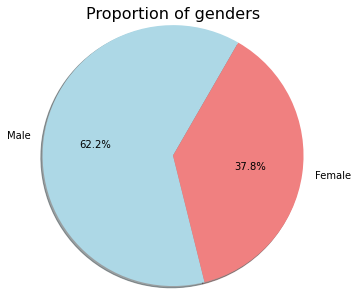

In [72]:
plt.pie(df['gender'].value_counts(), labels =['Male','Female'], radius=1.5, autopct='%1.1f%%',
        shadow=True, startangle=60,colors = ['lightblue', 'lightcoral'], data = df.gender);

plt.title("Proportion of genders",y=1.1 ,size = 16)

plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

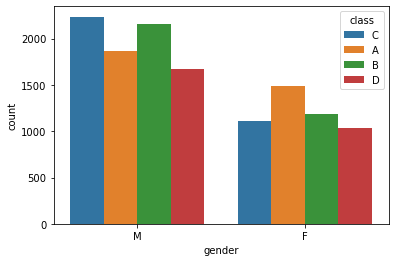

In [73]:
sns.countplot(x = df['gender'], data = df, hue = df['class'])

In [74]:
#df.age = df.age.astype(int)

In [75]:
#c = df.pivot_table(columns=['age'], aggfunc='size')
#c

In [76]:
df['class'].value_counts()

C    3349
A    3347
B    3346
D    2707
Name: class, dtype: int64

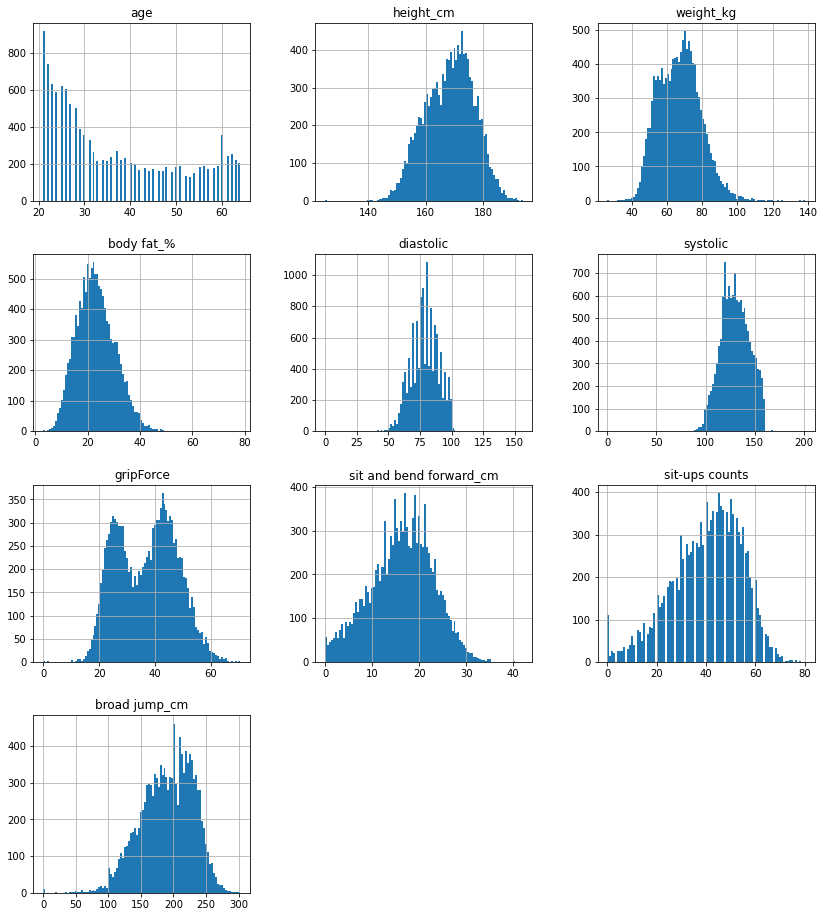

In [77]:
df.hist(bins=100 , figsize=(14,16))
plt.show()


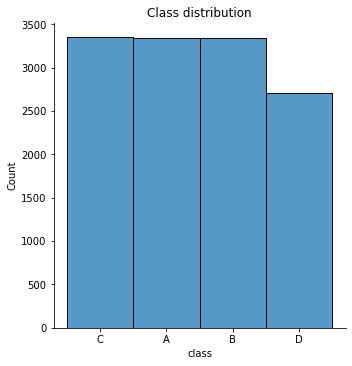

In [25]:
sns.displot(df, x="class").set(title="Class distribution");

In [26]:
#sns.countplot(df.class)
#sns.pairplot(df)

In [27]:
#df.groupby(by = 'class')['age'].describe() 

In [28]:
#sns.countplot(df.gender)
#sns.countplot(df.gender,hue=df.Class)
#plt.legend(loc=1,bbox_to_anchor=(1.2,1.01),title='Class')
#sns.despine(top=1,bottom=1,left=1,right=1)

<AxesSubplot:>

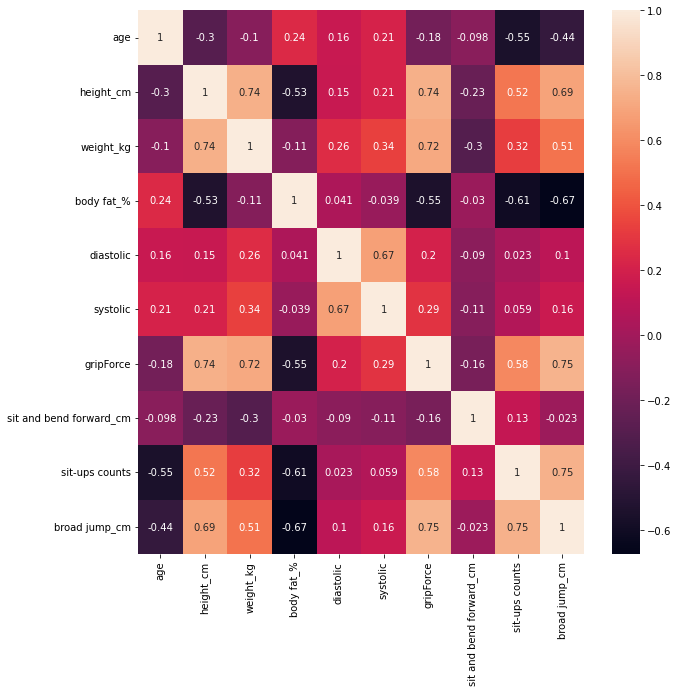

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

In [30]:
df['age'].value_counts()

21.0    917
22.0    738
23.0    632
25.0    622
26.0    605
24.0    588
27.0    523
28.0    503
29.0    387
30.0    358
60.0    358
31.0    328
37.0    267
32.0    264
62.0    254
61.0    244
36.0    234
39.0    231
38.0    220
63.0    220
34.0    218
35.0    215
33.0    215
40.0    202
64.0    201
41.0    200
56.0    187
59.0    187
51.0    186
50.0    182
48.0    181
55.0    181
43.0    178
58.0    174
57.0    173
45.0    169
42.0    163
46.0    162
47.0    161
44.0    161
49.0    153
54.0    147
52.0    132
53.0    128
Name: age, dtype: int64

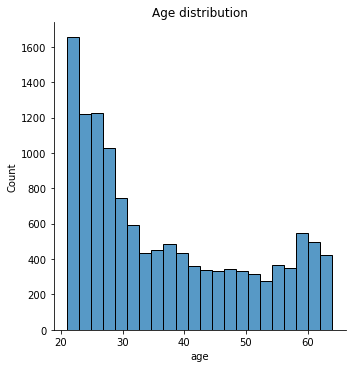

In [31]:
sns.displot(df, x="age").set(title="Age distribution");

In [32]:
#df.age.hist(bins=40)
#plt.xlabel('Age')
#plt.ylabel('Total number of Age')

In [33]:
# Encoding labels for gender & classes 
# A=0,B=1,C=2,D=4, M=1, F,M
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])
df["gender"] = le.fit_transform(df["gender"])

df.head(10)

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0       1      172.3      75.24        21.3       80.0     130.0   
1  25.0       1      165.0      55.80        15.7       77.0     126.0   
2  31.0       1      179.6      78.00        20.1       92.0     152.0   
3  32.0       1      174.5      71.10        18.4       76.0     147.0   
4  28.0       1      173.8      67.70        17.1       70.0     127.0   
5  36.0       0      165.4      55.40        22.0       64.0     119.0   
6  42.0       0      164.5      63.70        32.2       72.0     135.0   
7  33.0       1      174.9      77.20        36.9       84.0     137.0   
8  54.0       1      166.8      67.50        27.6       85.0     165.0   
9  28.0       1      185.0      84.60        14.4       81.0     156.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  class  
0       54.9                     18.4            60.0          217.0      2  
1       36.4                     16.3            53.0          229.0      0  
2       44.8                     12.0            49.0          181.0      2  
3       41.4                     15.2            53.0          219.0      1  
4       43.5                     27.1            45.0          217.0      1  
5       23.8                     21.0            27.0          153.0      1  
6       22.7                      0.8            18.0          146.0      3  
7       45.9                     12.3            42.0          234.0      1  
8       40.4                     18.6            34.0          148.0      2  
9       57.9                     12.1            55.0          213.0      1

<AxesSubplot:>

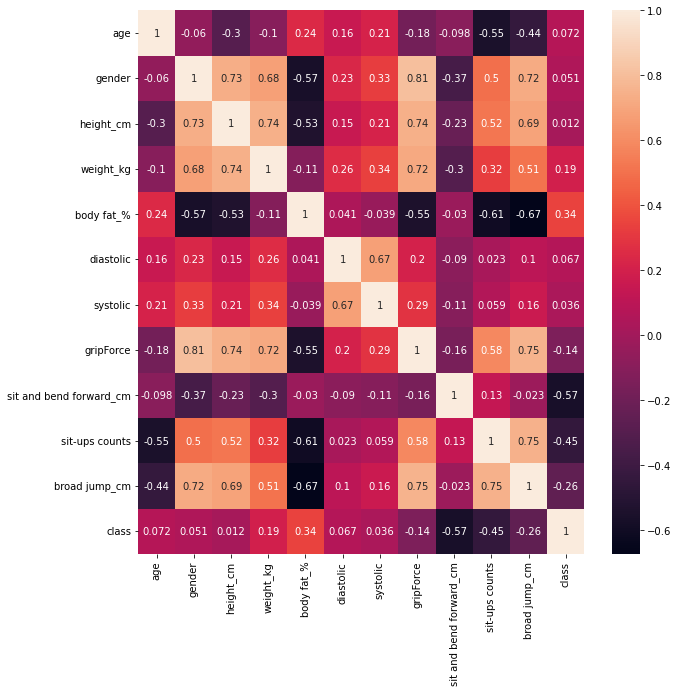

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

# Split the data

In [35]:
# detect input and output 
# X = input, y= output

X = df.drop(['class'], axis = 1)
X

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0       1      172.3      75.24        21.3       80.0     130.0   
1      25.0       1      165.0      55.80        15.7       77.0     126.0   
2      31.0       1      179.6      78.00        20.1       92.0     152.0   
3      32.0       1      174.5      71.10        18.4       76.0     147.0   
4      28.0       1      173.8      67.70        17.1       70.0     127.0   
...     ...     ...        ...        ...         ...        ...       ...   
13388  25.0       1      172.1      71.80        16.2       74.0     141.0   
13389  21.0       1      179.7      63.90        12.1       74.0     128.0   
13390  39.0       1      177.2      80.50        20.1       78.0     132.0   
13391  64.0       0      146.1      57.70        40.4       68.0     121.0   
13392  34.0       1      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
0           54.9                     18.4            60.0          217.0  
1           36.4                     16.3            53.0          229.0  
2           44.8                     12.0            49.0          181.0  
3           41.4                     15.2            53.0          219.0  
4           43.5                     27.1            45.0          217.0  
...          ...                      ...             ...            ...  
13388       35.8                     17.4            47.0          198.0  
13389       33.0                      1.1            48.0          167.0  
13390       63.5                     16.4            45.0          229.0  
13391       19.3                      9.2             0.0           75.0  
13392       35.9                      7.1            51.0          180.0  

[12749 rows x 11 columns]

In [36]:
# y will be the target which is class 
y = df['class']
y

0        2
1        0
2        2
3        1
4        1
        ..
13388    2
13389    3
13390    0
13391    3
13392    2
Name: class, Length: 12749, dtype: int32

In [37]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [38]:
X_train

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
11215  40.0       0      153.8       50.8        29.9       68.0     112.0   
700    29.0       1      187.0       85.3        14.6       95.0     151.0   
12722  42.0       1      168.0       76.2        25.0       99.0     145.0   
11243  22.0       0      156.5       47.6        30.7       95.0     131.0   
9851   61.0       0      148.6       54.8        34.2       54.0     104.0   
...     ...     ...        ...        ...         ...        ...       ...   
7670   61.0       1      168.4       75.5        30.2       80.0     117.0   
12227  28.0       0      165.3       55.7        26.6       77.0     129.0   
1414   40.0       1      178.9       77.3        26.0       99.0     159.0   
7672   25.0       1      181.0       77.9        13.5       94.0     129.0   
1353   22.0       0      172.0       60.5        20.7       76.0     117.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
11215       23.7                     18.2            29.0          156.0  
700         54.5                     17.0            59.0          234.0  
12722       37.4                     18.3            28.0          218.0  
11243       20.7                     20.6            32.0          153.0  
9851        25.4                     13.5             9.0          122.0  
...          ...                      ...             ...            ...  
7670        32.0                      7.9            22.0          140.0  
12227       25.1                     15.0            37.0          157.0  
1414        39.8                     21.9            43.0          221.0  
7672        50.5                     23.7            65.0          255.0  
1353        31.0                     30.2            37.0          198.0  

[10199 rows x 11 columns]

In [39]:
y_train

11215    1
700      0
12722    3
11243    1
9851     2
        ..
7670     3
12227    1
1414     2
7672     0
1353     0
Name: class, Length: 10199, dtype: int32

In [40]:
# feutrue scalinng 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_test_scaled

array([[-0.12707372, -1.29848679, -1.0746153 , ...,  0.84376426,
        -0.72669872, -0.88397435],
       [-1.00772482, -1.29848679, -0.884827  , ...,  1.29683715,
         0.05172665, -0.17826396],
       [ 0.31325183, -1.29848679, -0.94413585, ..., -0.45504469,
        -1.5051241 , -0.78315858],
       ...,
       [-0.86094964,  0.7701272 ,  0.19459395, ..., -0.31912282,
         0.68862014, -0.40509944],
       [-0.42062409, -1.29848679, -0.94413585, ...,  0.16415493,
        -0.72669872, -0.65713886],
       [-1.08111241, -1.29848679, -0.06636496, ...,  0.76825211,
         1.04244985, -0.07744819]])

In [42]:
X_train_scaled

array([[ 0.23986424, -1.29848679, -1.73887435, ...,  0.30007679,
        -0.79746467, -0.88397435],
       [-0.56739927,  0.7701272 ,  2.19923286, ...,  0.11884764,
         1.32551363,  1.08193316],
       [ 0.38663942,  0.7701272 , -0.05450319, ...,  0.31517922,
        -0.86823061,  0.67867008],
       ...,
       [ 0.23986424,  0.7701272 ,  1.2384296 , ...,  0.85886669,
         0.19325854,  0.75428191],
       [-0.86094964,  0.7701272 ,  1.48752674, ...,  1.13071042,
         1.75010929,  1.61121595],
       [-1.08111241, -1.29848679,  0.41996756, ...,  2.11236835,
        -0.23133712,  0.17459124]])

# Modeling


# Modles and its evaulation



In [43]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
drc = DecisionTreeClassifier()
drc.fit(X_train_scaled, y_train)
y_pred_drc = drc.predict(X_test_scaled)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_drc, y_test))


              precision    recall  f1-score   support

           0       0.71      0.69      0.70       701
           1       0.50      0.52      0.51       628
           2       0.59      0.62      0.61       665
           3       0.74      0.70      0.72       556

    accuracy                           0.63      2550
   macro avg       0.64      0.63      0.64      2550
weighted avg       0.64      0.63      0.64      2550



In [45]:
#apply Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_rf, y_test))


              precision    recall  f1-score   support

           0       0.87      0.71      0.78       829
           1       0.55      0.58      0.57       607
           2       0.66      0.73      0.69       620
           3       0.79      0.84      0.82       494

    accuracy                           0.71      2550
   macro avg       0.71      0.72      0.71      2550
weighted avg       0.72      0.71      0.72      2550



# Conclustion

#### Random forest classifier out preformed the decision tree classifier  by ~9%